<a href="https://colab.research.google.com/github/Vamarinpe/PAE/blob/master/CodRecurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Por agente

# importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime
import csv

Datos = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Recurso.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Fecha","Codigo Agente","Recurso"],
    usecols=["Fecha","Codigo Agente","Recurso","Precio Oferta Ideal"],      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma
    parse_dates=["Fecha"],
    dayfirst=True)

# VISUALIZACIÓN DATOS

In [0]:
# verificar lectura
len(Datos)
Datos.columns
Datos.describe()
Datos.head(60)
Datos.count()

In [0]:
# contando registros con groupby
Datos.groupby('Codigo Agente')['Precio Oferta Ideal'].count()
Datos.groupby('Recurso')['Precio Oferta Ideal'].count()
Datos.groupby('Fecha')['Precio Oferta Ideal'].count()            # también sin el ['Precio Oferta Ideal']
#Datos.groupby('Codigo Agente').count()

In [0]:
# muestra con loc, debe decir los indices especificos, de mayor a menor
Datos.loc[('2012-09-04')]
Datos.loc[('2012-09-04','EPMG')]
plt.plot(Datos.loc[('2017-09-05','EPMG')])
plt.plot(Datos.loc[('2017-09-06','EPMG')])
plt.plot(Datos.loc[('2019-08-31','EPMG')])
plt.show()
#Datos.loc['2012-01-01':'2013-12-31']                         # también funciona para rangos

In [0]:
# muestra con iloc, encuentra el dato que le digo en numero
Datos.iloc[-2:]

In [0]:
# muestra con xs, filtra y muestra todo lo del nivel especifico indicado, muestra lo de los demás indices
Datos.xs('2012-06-08',level='Fecha')
Datos.xs('EPMG',level='Codigo Agente')
Datos.xs('GUATAPE',level='Recurso').plot()
Datos.xs('PLAYAS',level='Recurso').plot()
plt.rcParams["figure.figsize"] = (20,8)

Datos.xs('GUATAPE',level='Recurso')

In [0]:
p=Datos.loc['2012-01-01':'2018-08-31']
p.xs('TEBSAB',level='Recurso').plot()                      # grafica de cierto recurso en cierto tiempo
plt.rcParams["figure.figsize"] = (20,8)

# IDENTIFICAR RECURSOS REPRESENTATIVOS

In [0]:
# agrega columna con el combustible
Combustible = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Listado_Recursos_Generacion.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Nombre Recurso"],
    usecols=["Nombre Recurso","Combustible Por Defecto"])      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma

Datos['Combustible']=Datos.index.get_level_values('Recurso').map(Combustible['Combustible Por Defecto'])

In [0]:
# funcion para obtener los recursos de más capacidad en cada año (10 primeros)
def capacidad(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta kW","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta kW',ascending=False).drop_duplicates().head(10)

def capacidad1(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta',ascending=False).drop_duplicates().head(10)

C2000=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2000.csv")
C2001=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2001.csv")
C2002=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2002.csv")
C2003=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2003.csv")
C2004=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2004.csv")
C2005=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2005.csv")
C2006=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2006.csv")
C2007=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2007.csv")
C2008=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2008.csv")
C2009=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2009.csv")
C2010=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2010.csv")
C2011=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2011.csv")
C2012=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2012.csv")
C2013=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2013.csv")
C2014=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2014.csv")
C2015=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2015.csv")
C2016=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2016.csv")
C2017=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2017.csv")


In [0]:
# filtra Datos y muestra solo los que tienen mayor capacidad
#2000
Datos2000=Datos.loc['2000']
NuevaDatos2000=Datos2000[Datos2000.index.get_level_values('Recurso').isin(list(C2000.index))]
#2001
Datos2001=Datos.loc['2001']
NuevaDatos2001=Datos2001[Datos2001.index.get_level_values('Recurso').isin(list(C2001.index))]
#2002
Datos2002=Datos.loc['2002']
NuevaDatos2002=Datos2002[Datos2002.index.get_level_values('Recurso').isin(list(C2002.index))]
#2003
Datos2003=Datos.loc['2003']
NuevaDatos2003=Datos2003[Datos2003.index.get_level_values('Recurso').isin(list(C2003.index))]
#2004
Datos2004=Datos.loc['2004']
NuevaDatos2004=Datos2004[Datos2004.index.get_level_values('Recurso').isin(list(C2004.index))]
#2005
Datos2005=Datos.loc['2005']
NuevaDatos2005=Datos2005[Datos2005.index.get_level_values('Recurso').isin(list(C2005.index))]
#2006
Datos2006=Datos.loc['2006']
NuevaDatos2006=Datos2006[Datos2006.index.get_level_values('Recurso').isin(list(C2006.index))]
#2007
Datos2007=Datos.loc['2007']
NuevaDatos2007=Datos2007[Datos2007.index.get_level_values('Recurso').isin(list(C2007.index))]
#2008
Datos2008=Datos.loc['2008']
NuevaDatos2008=Datos2008[Datos2008.index.get_level_values('Recurso').isin(list(C2008.index))]
#2009
Datos2009=Datos.loc['2009']
NuevaDatos2009=Datos2009[Datos2009.index.get_level_values('Recurso').isin(list(C2009.index))]
#2010
Datos2010=Datos.loc['2010']
NuevaDatos2010=Datos2010[Datos2010.index.get_level_values('Recurso').isin(list(C2010.index))]
#2011
Datos2011=Datos.loc['2011']
NuevaDatos2011=Datos2011[Datos2011.index.get_level_values('Recurso').isin(list(C2011.index))]
#2012
Datos2012=Datos.loc['2012']
NuevaDatos2012=Datos2012[Datos2012.index.get_level_values('Recurso').isin(list(C2012.index))]
#2013
Datos2013=Datos.loc['2013']
NuevaDatos2013=Datos2013[Datos2013.index.get_level_values('Recurso').isin(list(C2013.index))]
#2014
Datos2014=Datos.loc['2014']
NuevaDatos2014=Datos2014[Datos2014.index.get_level_values('Recurso').isin(list(C2014.index))]
#2015
Datos2015=Datos.loc['2015']
NuevaDatos2015=Datos2015[Datos2015.index.get_level_values('Recurso').isin(list(C2015.index))]
#2008
Datos2016=Datos.loc['2016']
NuevaDatos2016=Datos2016[Datos2016.index.get_level_values('Recurso').isin(list(C2016.index))]
#20017
Datos2017=Datos.loc['2017']
NuevaDatos2017=Datos2017[Datos2017.index.get_level_values('Recurso').isin(list(C2017.index))]

Datos_filtrado=pd.concat([NuevaDatos2000,NuevaDatos2001,NuevaDatos2002,NuevaDatos2003,NuevaDatos2004,NuevaDatos2005,NuevaDatos2006,NuevaDatos2007,NuevaDatos2008,
                          NuevaDatos2009,NuevaDatos2010,NuevaDatos2011,NuevaDatos2012,NuevaDatos2013,NuevaDatos2014,NuevaDatos2015,NuevaDatos2016,NuevaDatos2017,])
Datos_filtrado

                                     Precio Oferta Ideal Combustible
Fecha      Codigo Agente Recurso                                    
2000-01-01 CHBG          BETANIA                   44.95        AGUA
           EMGG          CASALCO                   49.70        AGUA
           CHVG          CHIVOR                    48.37        AGUA
           EPMG          GUATAPE                   25.59        AGUA
                         GUATRON                   58.28        AGUA
...                                                  ...         ...
2017-12-31 ENDG          PAGUA                    169.24        AGUA
           EPMG          PORCE III                129.24        AGUA
           ISGG          SAN CARLOS               150.24        AGUA
                         SOGAMOSO                 174.24        AGUA
           TBSG          TEBSAB                   381.13         GAS

[58852 rows x 2 columns]

In [0]:
# cuenta de esos primeros, que combustible usan
Datos_filtrado.groupby('Combustible').count()
Datos_filtrado['Combustible']                # muestra la columna
Datos_filtrado.index.names[2]                            # muestra nombre index 2
a=Datos_filtrado.index.get_level_values('Recurso').drop_duplicates()       # muestra los datos de un indice
print(a)

a.map(Combustible['Combustible Por Defecto'])

Index(['BETANIA', 'CASALCO', 'CHIVOR', 'GUATAPE', 'GUATRON', 'GUAVIO', 'PAGUA',
       'SAN CARLOS', 'TEBSAB', 'ALBAN', 'TERMOSIERRAB', 'PORCE III',
       'SOGAMOSO'],
      dtype='object', name='Recurso')


Index(['AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'GAS',
       'AGUA', 'ACPM', 'AGUA', 'AGUA'],
      dtype='object', name='Recurso')

#MODELOS

# MODELO ARIMA PARA BETANIA

mean1=124.534275, mean2=188.375456
variance1=35631.679756, variance2=48755.339585


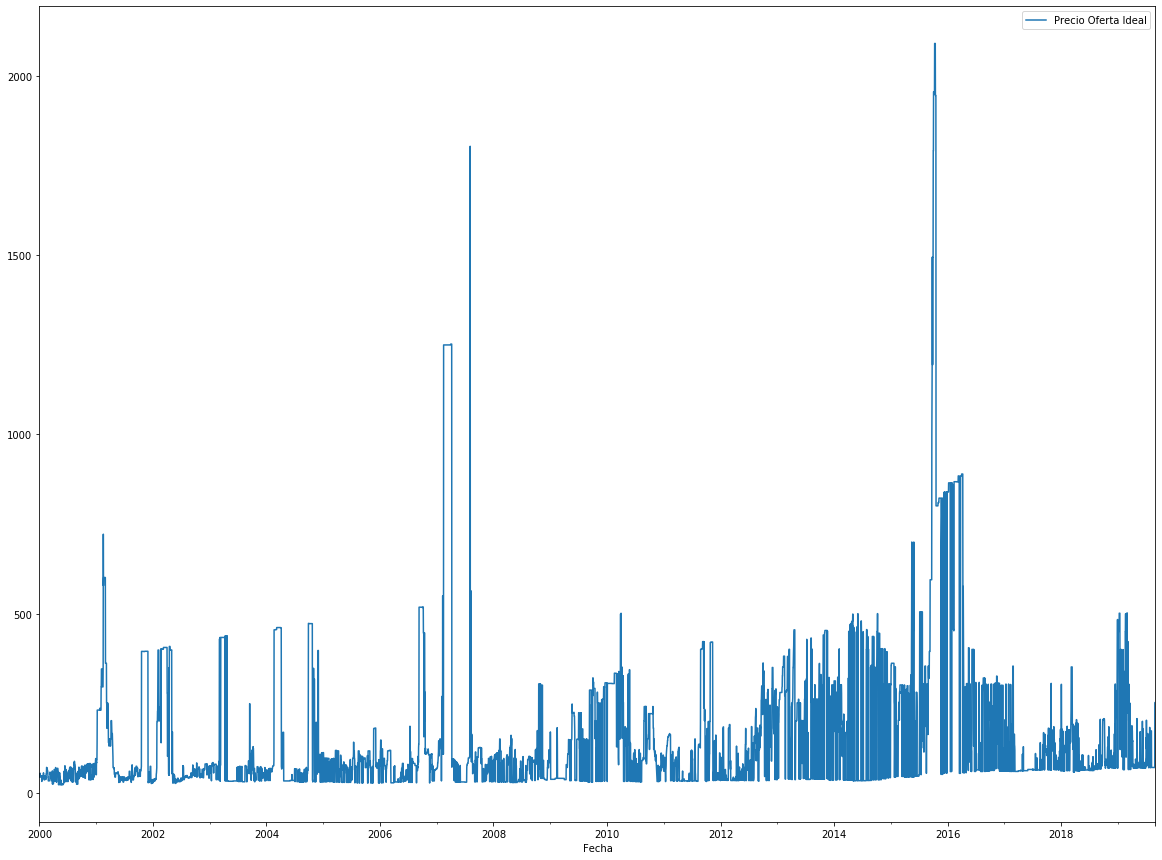

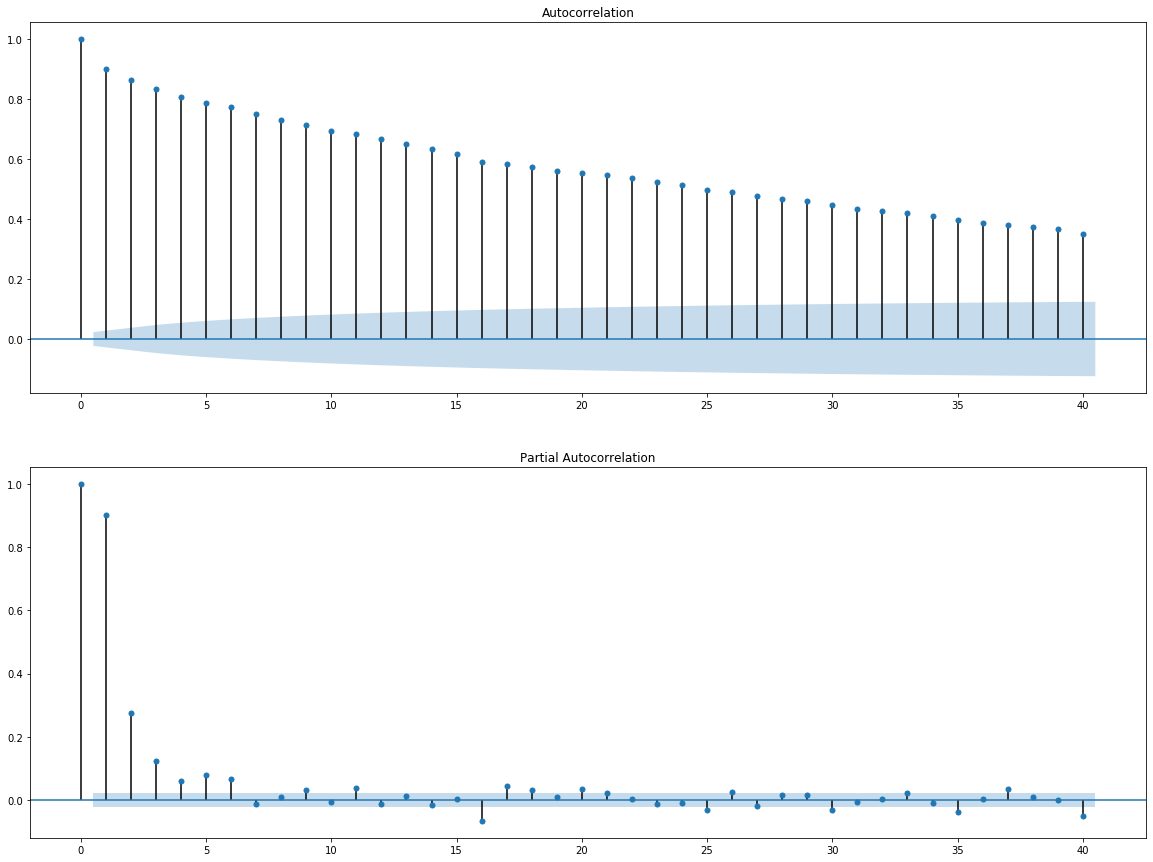

In [2]:
# SERIE NORMAL

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

plt.rcParams["figure.figsize"] = (20,15)
M1Betania=Datos.xs('BETANIA',level='Recurso')                # Quita las ultimas 718 (6465)
M1Betania=M1Betania.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
M1Betania.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1Betania.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1Betania, lags=40, ax=ax2)

X = M1Betania['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(prueba, model='multiplicative', freq=365)
#result.plot()
#pyplot.show()

mean1=4.331325, mean2=4.775806
variance1=0.726766, variance2=0.884310


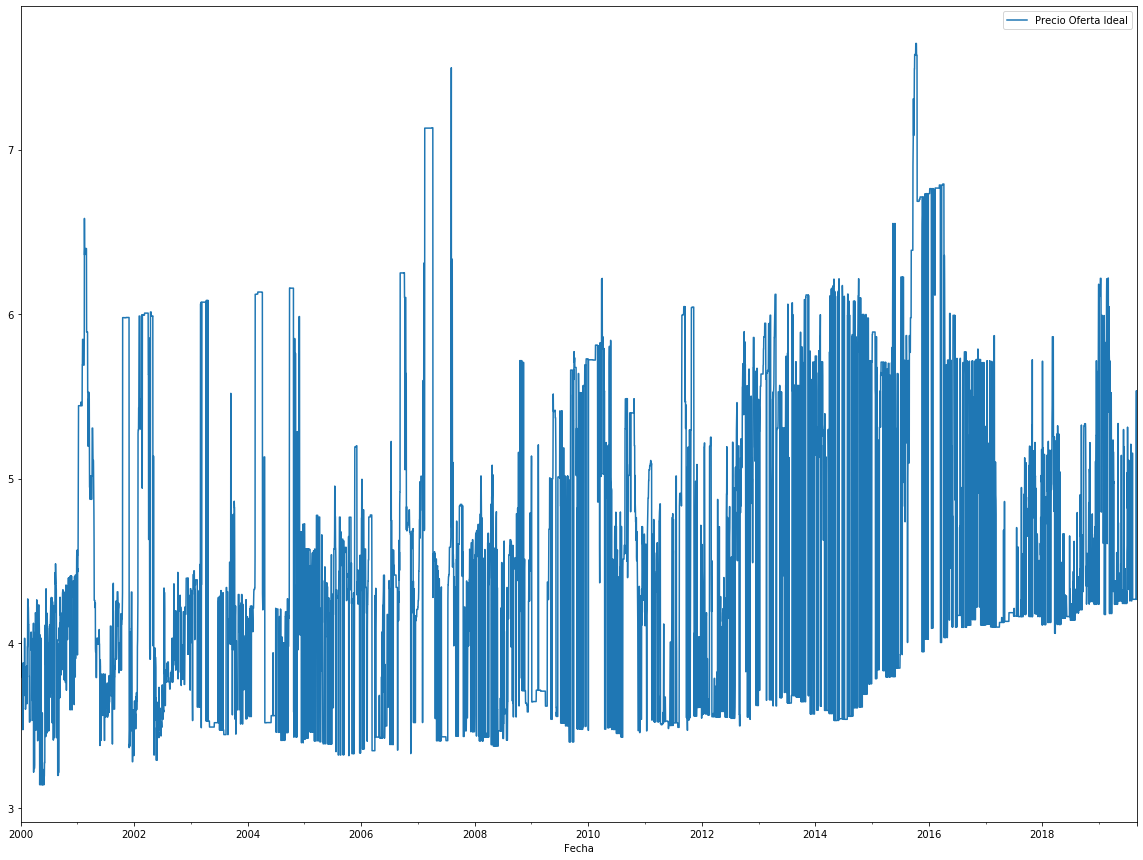

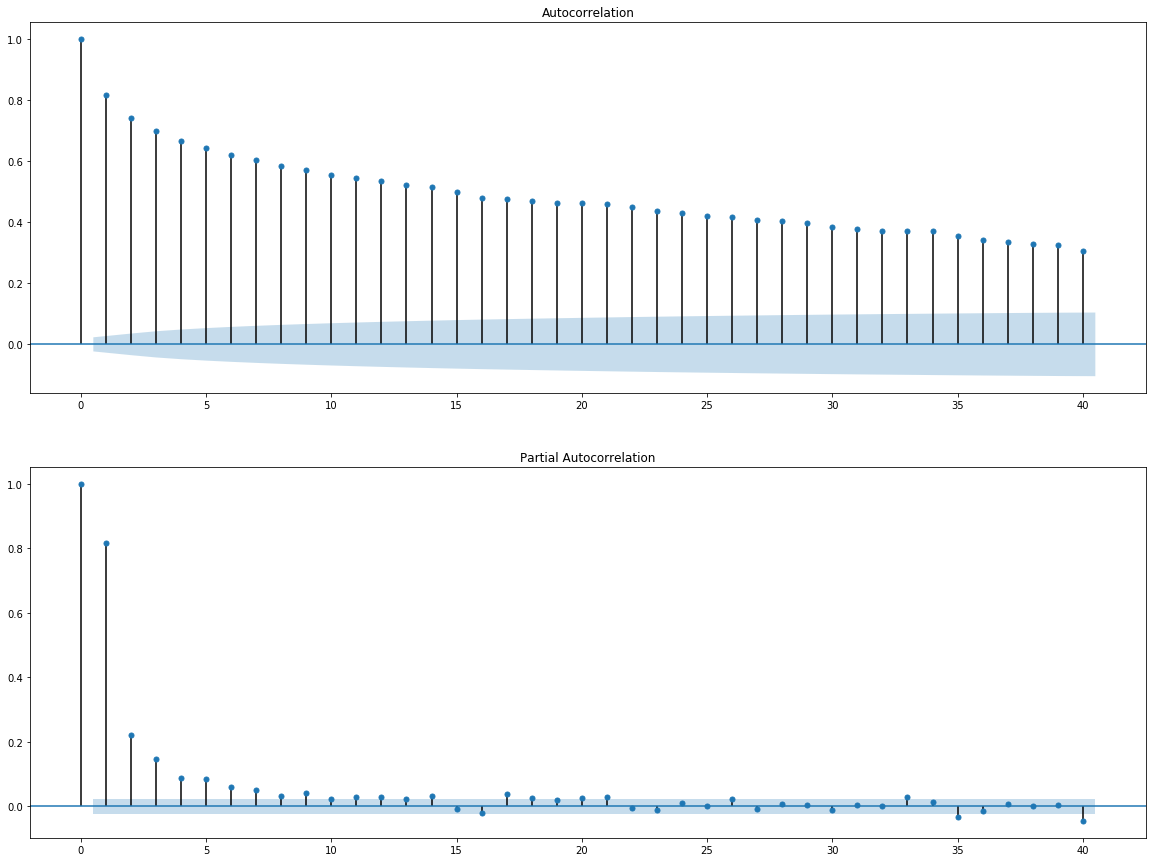

In [3]:
# TRANSFORMACION LOGARITMO PARA ESTABILIZAR VARIANZA

M1BetaniaLog=np.log(M1Betania)
M1BetaniaLog.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1BetaniaLog.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1BetaniaLog, lags=40, ax=ax2)

X = M1BetaniaLog['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

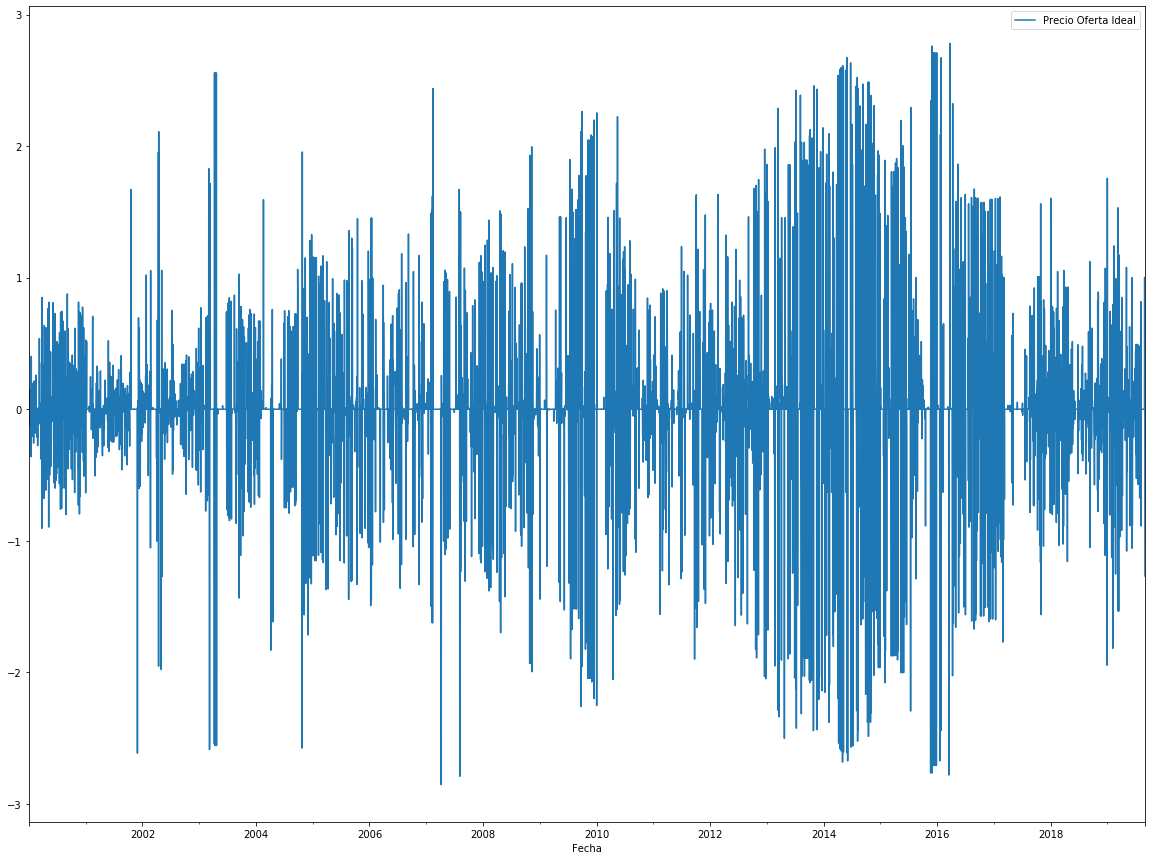

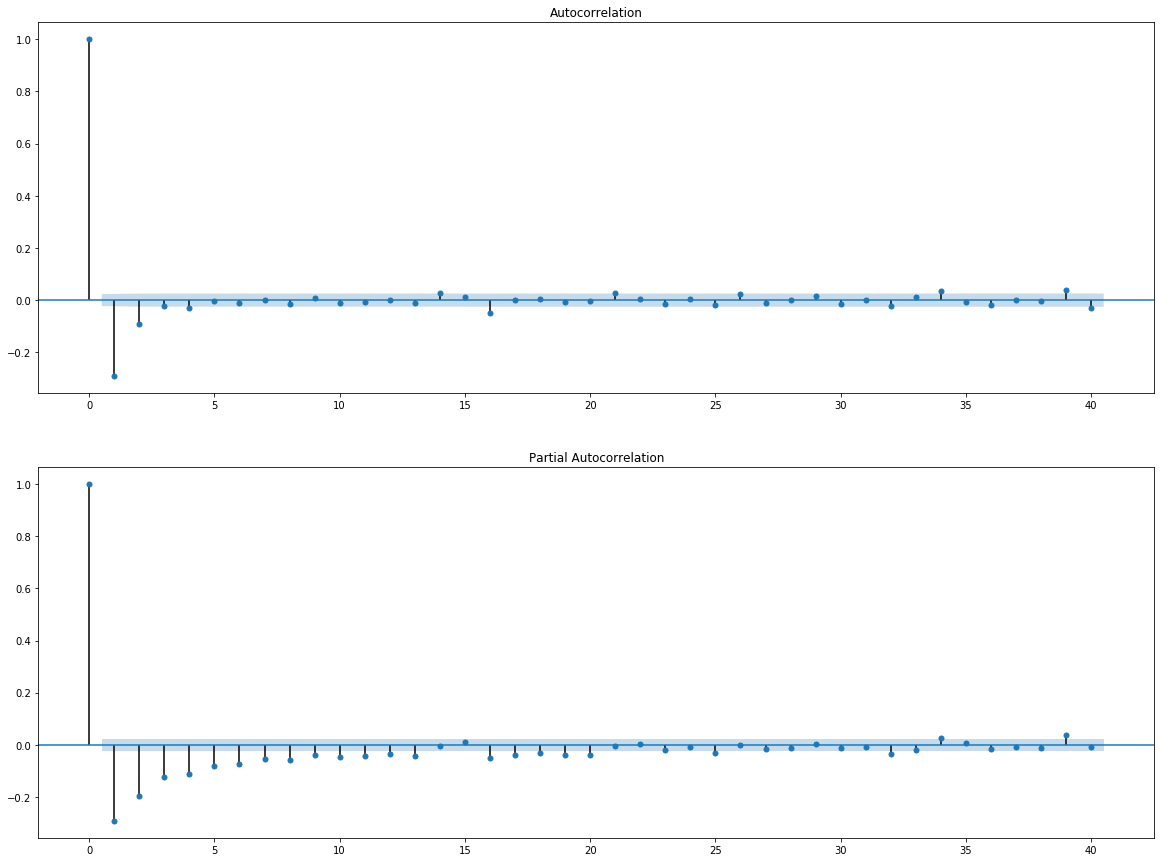

In [4]:
# PRIMERA DIFERENCIACIÓN PARA VOLVER ESTACIONAL
M1BetaniaLogDif=M1BetaniaLog.diff()
M1BetaniaLogDif=M1BetaniaLogDif[1:]
M1BetaniaLogDif.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1BetaniaLogDif.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1BetaniaLogDif, lags=40, ax=ax2)

In [5]:
M1BetaniaLogA=M1BetaniaLog.iloc[:6465]
validar=M1BetaniaLog.iloc[6465:]
validar

            Precio Oferta Ideal
Fecha                          
2017-09-13             4.174387
2017-09-14             4.174387
2017-09-15             4.908972
2017-09-16             4.174387
2017-09-17             4.174387
...                         ...
2019-08-27             4.266896
2019-08-28             4.266896
2019-08-29             5.269455
2019-08-30             5.534614
2019-08-31             4.266896

[718 rows x 1 columns]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                            Statespace Model Results                           
Dep. Variable:     Precio Oferta Ideal   No. Observations:                 6465
Model:                SARIMAX(0, 1, 2)   Log Likelihood               -5066.144
Date:                 Mon, 28 Oct 2019   AIC                          10140.288
Time:                         23:47:10   BIC                          10167.384
Sample:                     01-01-2000   HQIC                         10149.663
                          - 09-12-2017                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.003      0.058      0.954      -0.005       0.006
ma.L1         -0.4192      0.008    -50.621      0.000      -0.435      -0.403
ma.L2         -0.1853      0.008    -24.549 

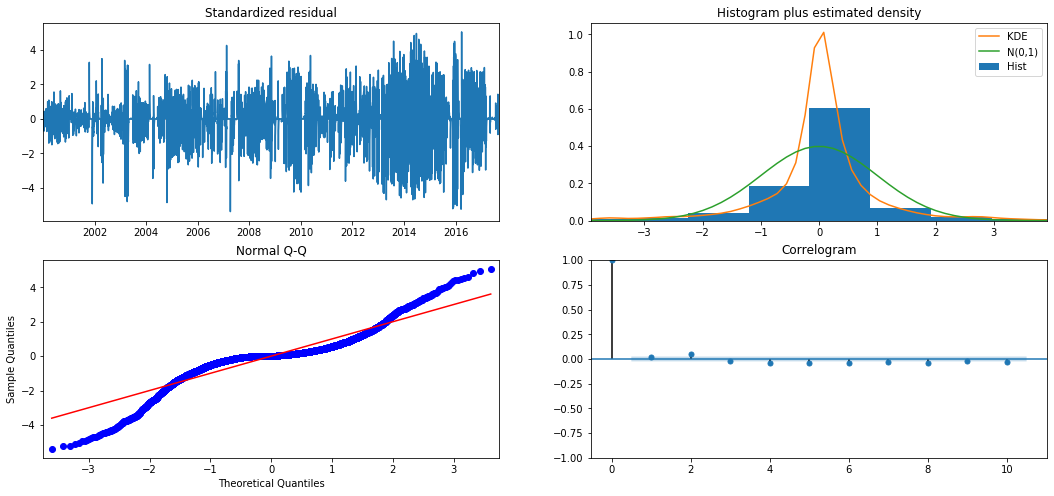

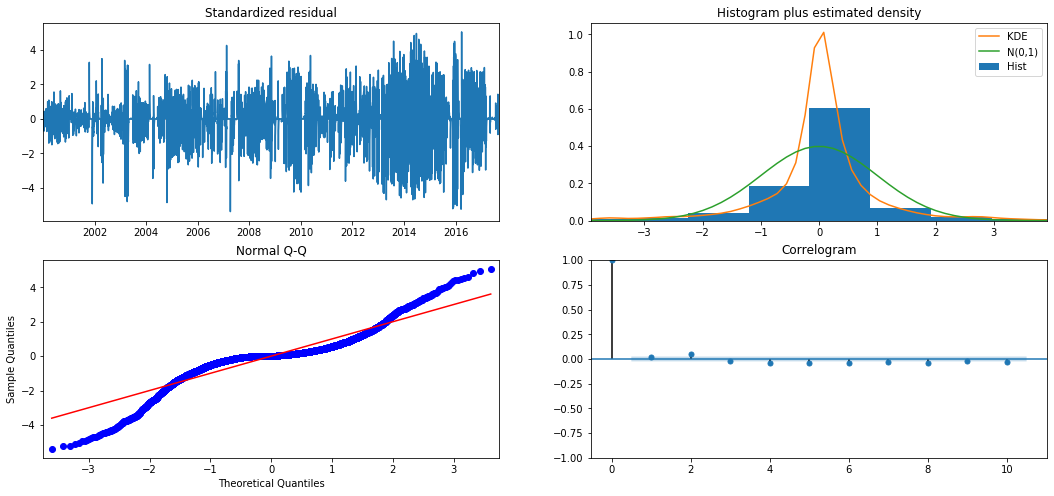

In [6]:
# MODELO IDENTIFICADO GRAFICAMENTE EN ACF Y PACF DE LA PRIMERA DIFERENCIA DEL LOGARITMO
Modelo1Betania = sm.tsa.statespace.SARIMAX(M1BetaniaLogA, trend='c', order=(0,1,2)).fit(disp=False)
print(Modelo1Betania.summary())
print(stats.normaltest(Modelo1Betania.resid))

Modelo1Betania.plot_diagnostics(figsize=(18, 8))

ARIMA model MSE:0.3670745565325071


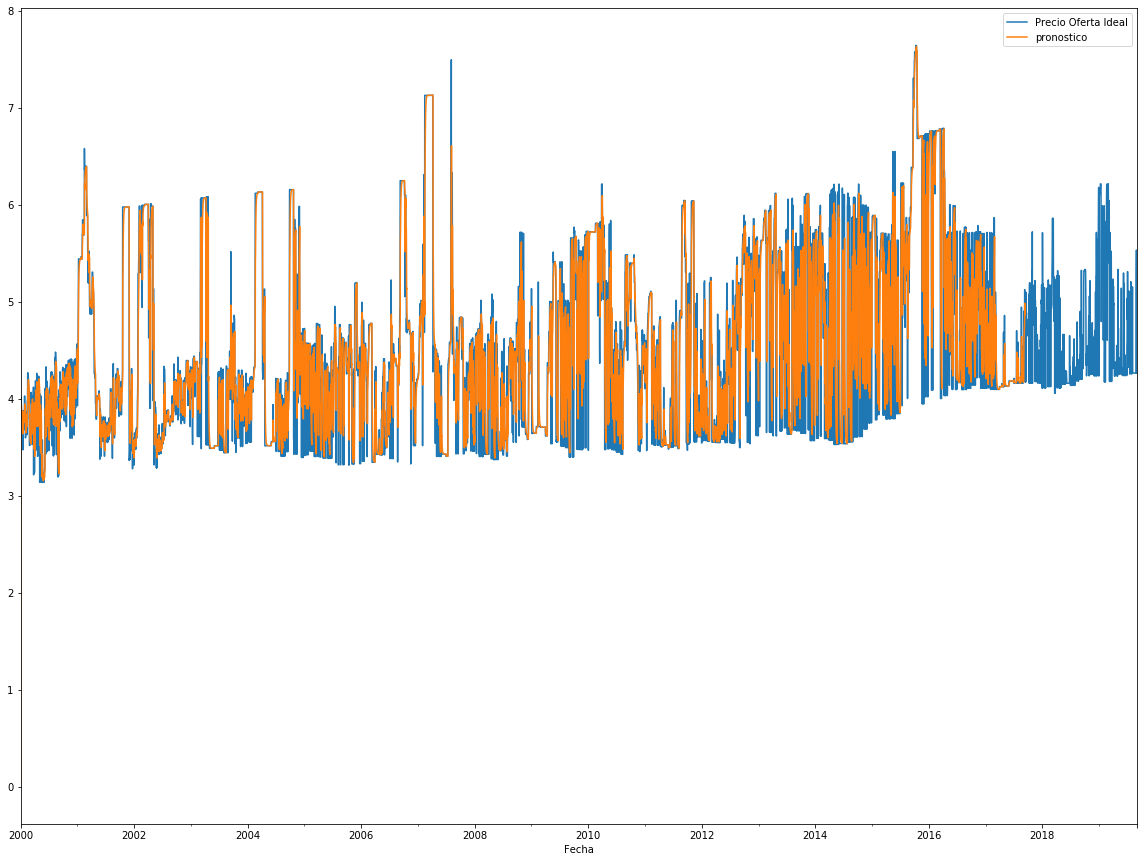

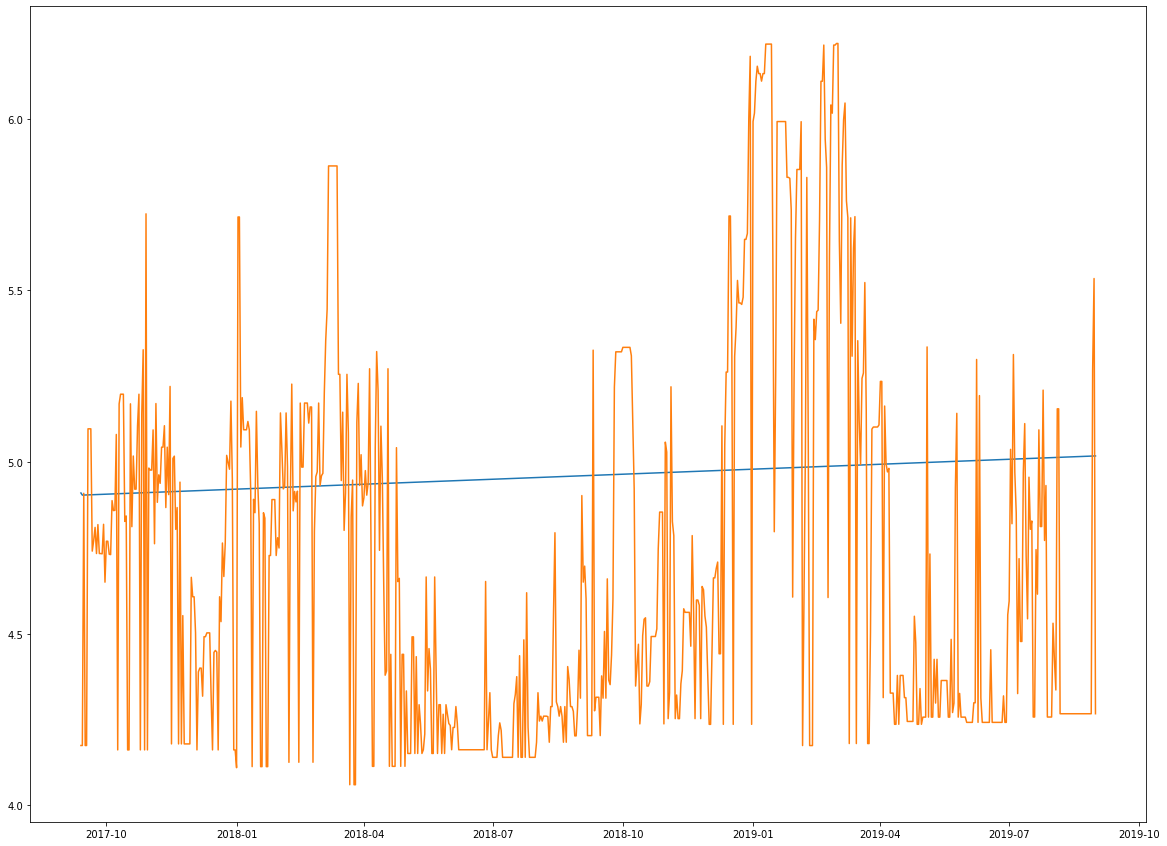

In [7]:
from sklearn.metrics import mean_squared_error
M1BetaniaLog['pronostico'] = Modelo1Betania.fittedvalues  
plot = M1BetaniaLog[['Precio Oferta Ideal', 'pronostico']].plot(figsize=(20, 15))

pred = Modelo1Betania.predict('2017-09-12','2019-08-31')[1:]
plt.figure(figsize=(20,15))
print('ARIMA model MSE:{}'.format(mean_squared_error(validar,pred)))
plt.plot(pred)
plt.plot(validar)
plt.show()

In [9]:
import warnings

aic_full = pd.DataFrame(np.zeros((6,6), dtype=float))

warnings.simplefilter('ignore')

# Iterate over all ARMA(p,q) models with p,q in [0,6]
for p in range(6):
    for q in range(6):
        if p == 0 and q == 0:
            continue
            
        # Estimate the model with no missing datapoints
        mod = sm.tsa.statespace.SARIMAX(M1BetaniaLogA, order=(p,1,q))
        try:
            res = mod.fit(disp=False)
            aic_full.iloc[p,q] = res.aic
        except:
            aic_full.iloc[p,q] = np.nan
print(res.summary())

                            Statespace Model Results                           
Dep. Variable:     Precio Oferta Ideal   No. Observations:                 6465
Model:                SARIMAX(5, 1, 5)   Log Likelihood               -4988.045
Date:                 Mon, 28 Oct 2019   AIC                           9998.091
Time:                         23:02:55   BIC                          10072.605
Sample:                     01-01-2000   HQIC                         10023.870
                          - 09-12-2017                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6455      0.060    -10.806      0.000      -0.763      -0.528
ar.L2          0.4044      0.042      9.521      0.000       0.321       0.488
ar.L3          0.9682      0.042     22.794 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                            Statespace Model Results                           
Dep. Variable:     Precio Oferta Ideal   No. Observations:                 6465
Model:                SARIMAX(5, 1, 5)   Log Likelihood               -4993.926
Date:                 Mon, 28 Oct 2019   AIC                          10011.852
Time:                         23:48:49   BIC                          10093.140
Sample:                     01-01-2000   HQIC                         10039.975
                          - 09-12-2017                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.365e-06      0.000      0.061      0.951      -0.000       0.000
ar.L1         -0.6778      0.079     -8.544      0.000      -0.833      -0.522
ar.L2          0.4016      0.066      6.062 

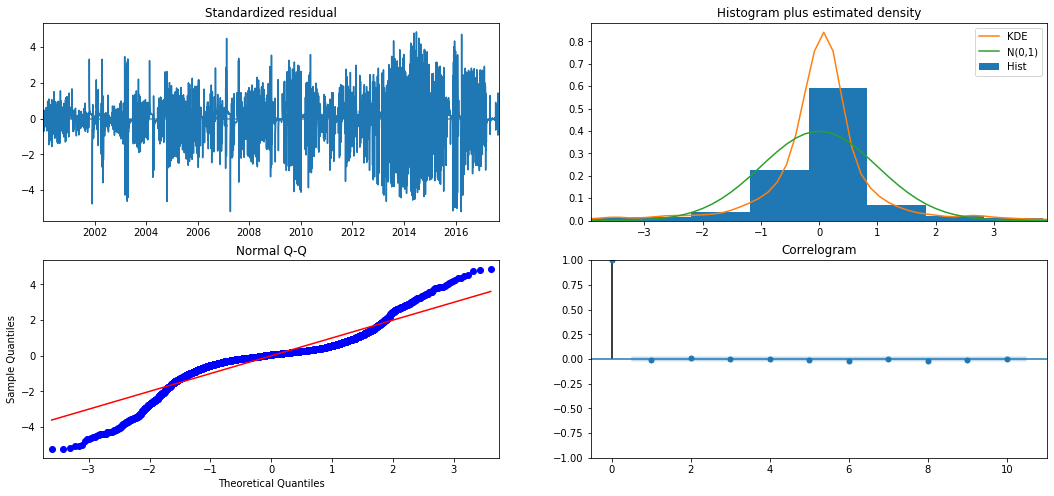

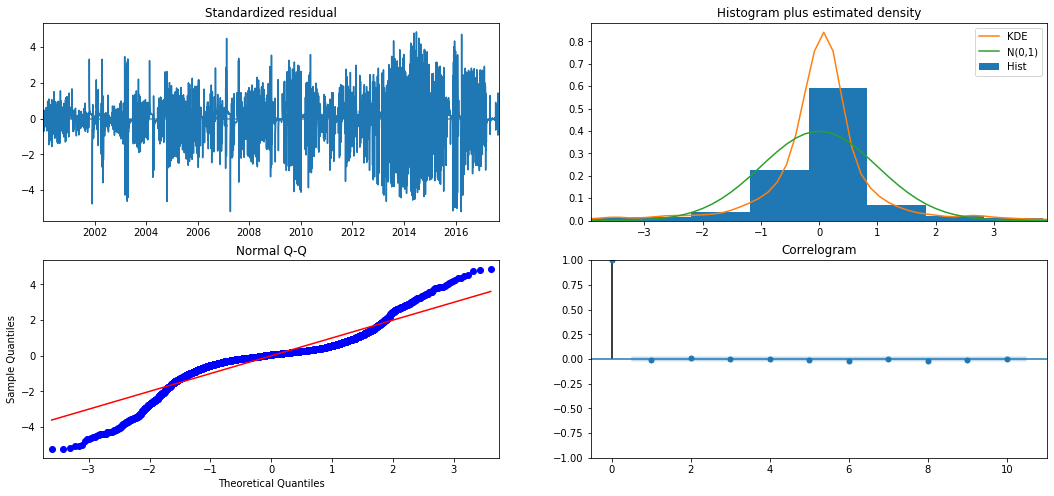

In [8]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
Modelo2Betania = sm.tsa.statespace.SARIMAX(M1BetaniaLogA, trend='c', order=(5,1,5)).fit(disp=False)
print(Modelo2Betania.summary())
print(stats.normaltest(Modelo2Betania.resid))

Modelo2Betania.plot_diagnostics(figsize=(18, 8))

ARIMA model MSE:0.36345647727070757


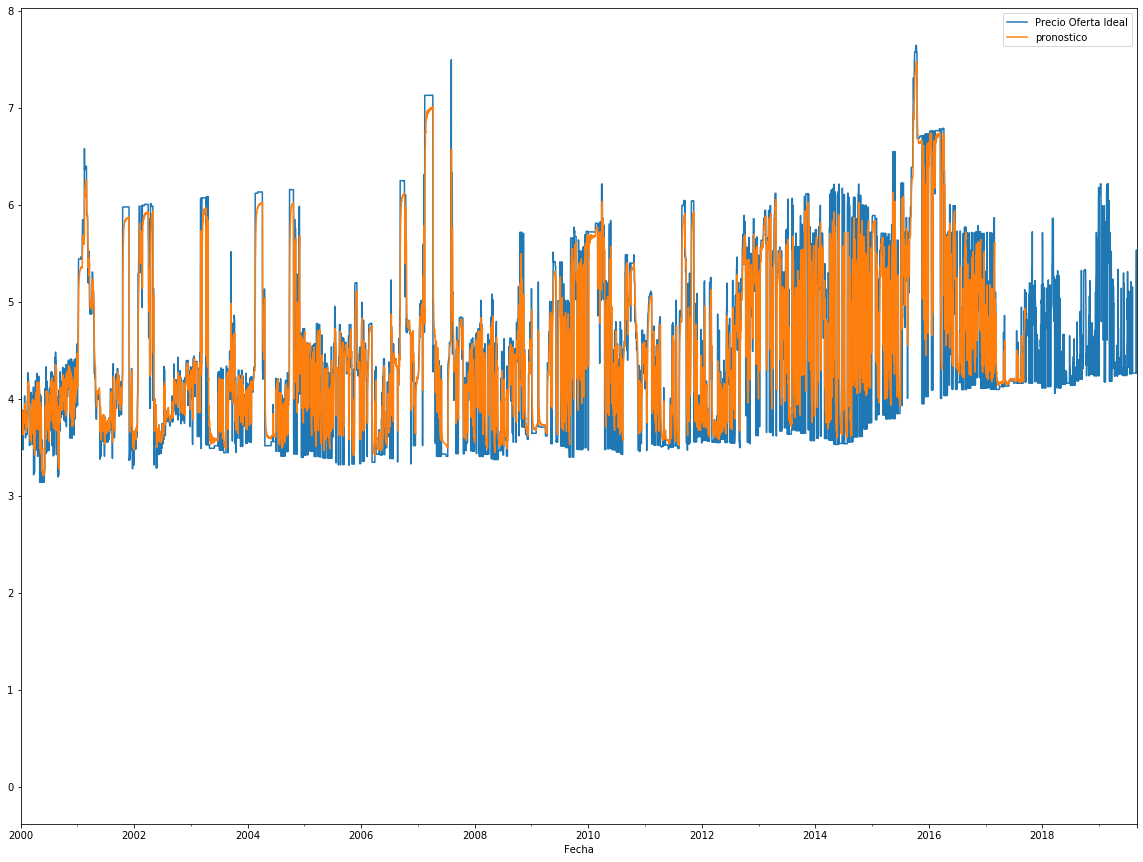

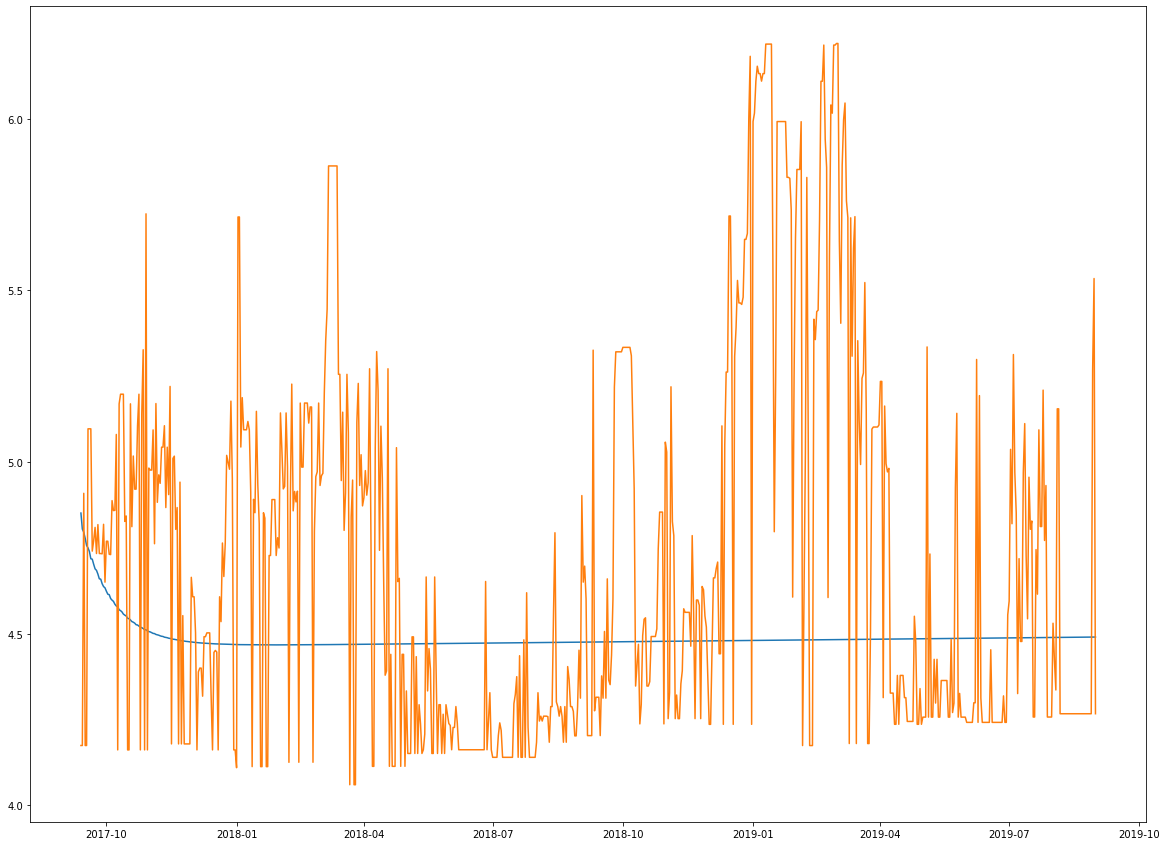

In [9]:
from sklearn.metrics import mean_squared_error
M1BetaniaLog['pronostico'] = Modelo2Betania.fittedvalues  
plot = M1BetaniaLog[['Precio Oferta Ideal', 'pronostico']].plot(figsize=(20, 15))

pred = Modelo2Betania.predict('2017-09-12','2019-08-31')[1:]
plt.figure(figsize=(20,15))
print('ARIMA model MSE:{}'.format(mean_squared_error(validar,pred)))
plt.plot(pred)
plt.plot(validar)
plt.show()

# MODELO ARIMA PARA TEBSAB

mean1=107.254142, mean2=246.815137
variance1=1185.609724, variance2=11829.478864


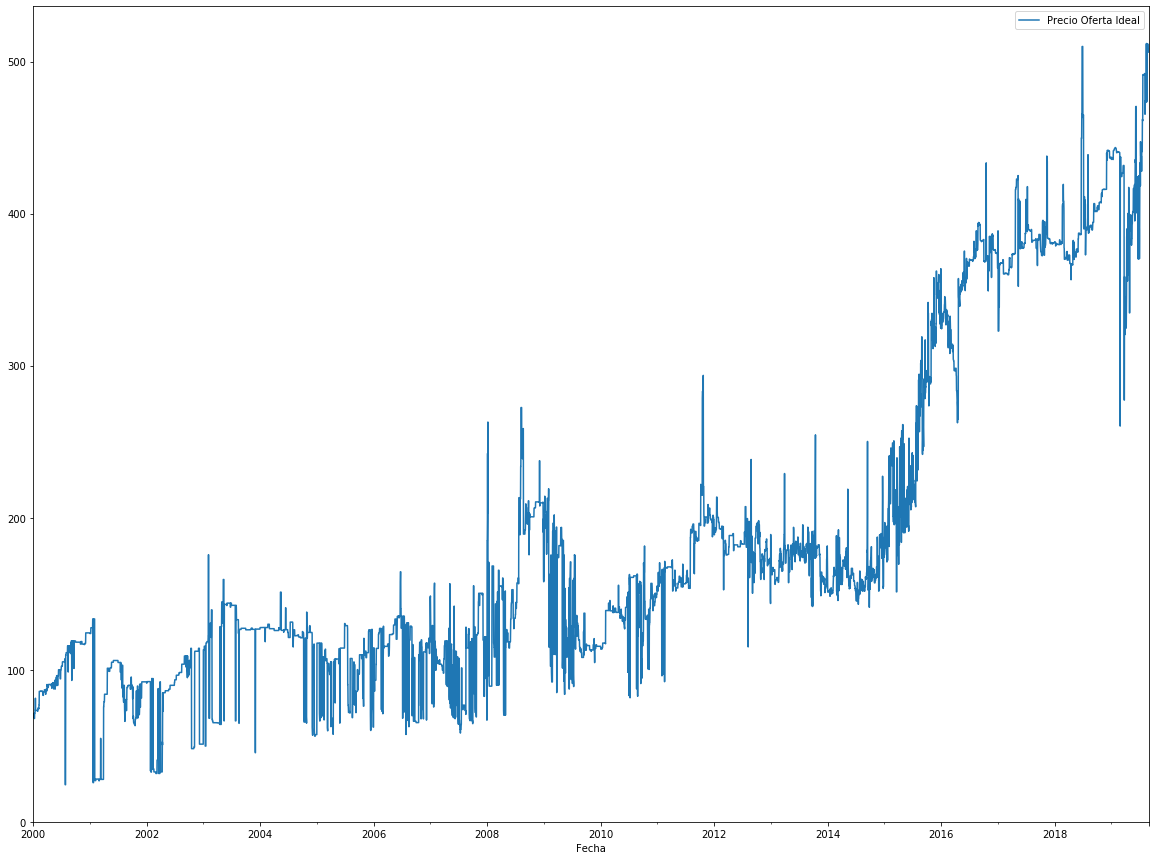

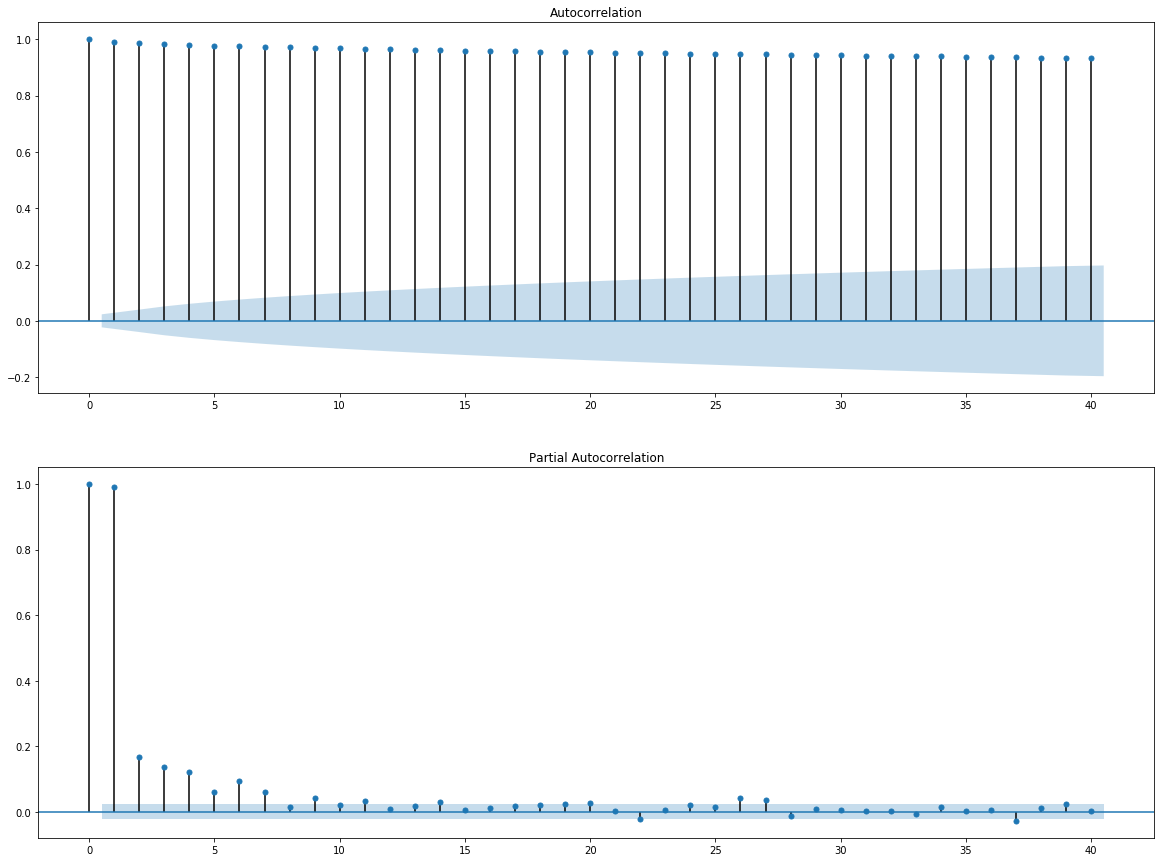

In [10]:
# SERIE NORMAL
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

plt.rcParams["figure.figsize"] = (20,15)
M1Tebsab=Datos.xs('TEBSAB',level='Recurso')                # Quita las ultimas 718 (6465)
M1Tebsab=M1Tebsab.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
M1Tebsab.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1Tebsab.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1Tebsab, lags=40, ax=ax2)

X = M1Tebsab['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(prueba, model='multiplicative', freq=365)
#result.plot()
#pyplot.show()

mean1=4.615471, mean2=5.412795
variance1=0.136717, variance2=0.190862


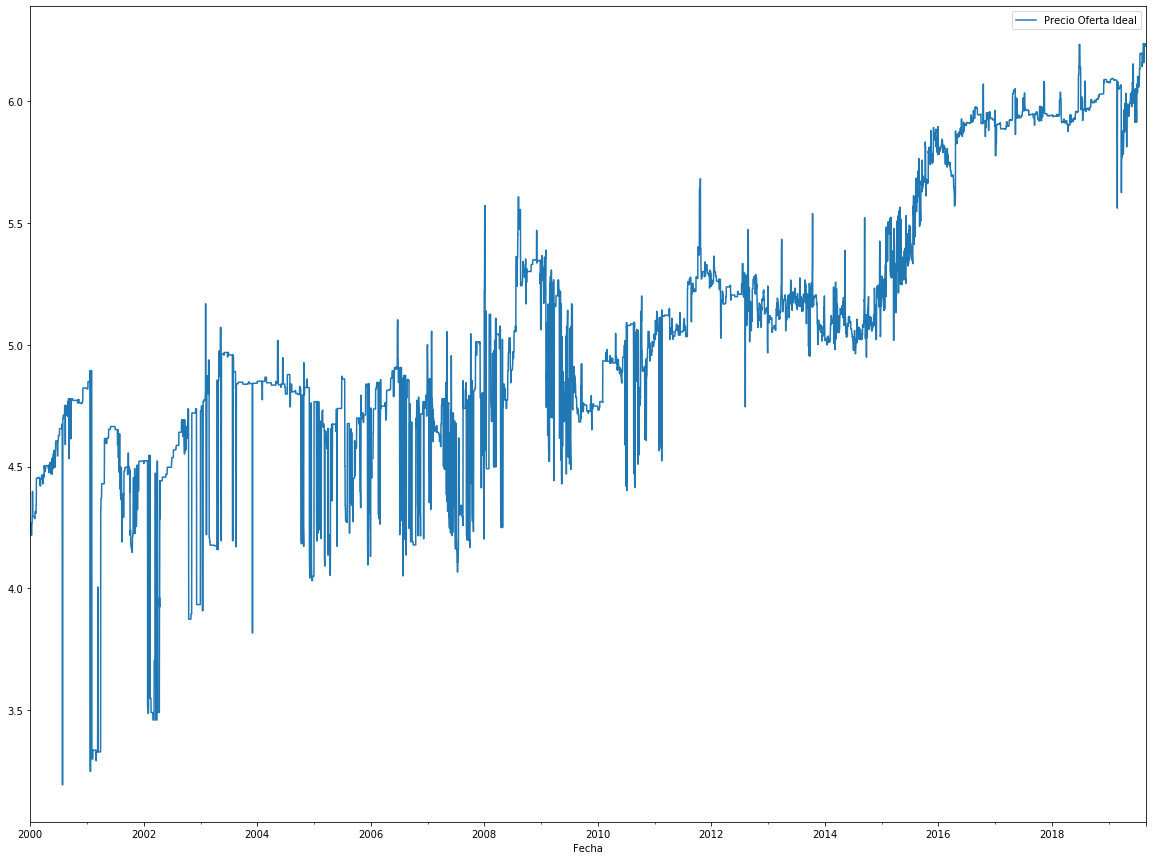

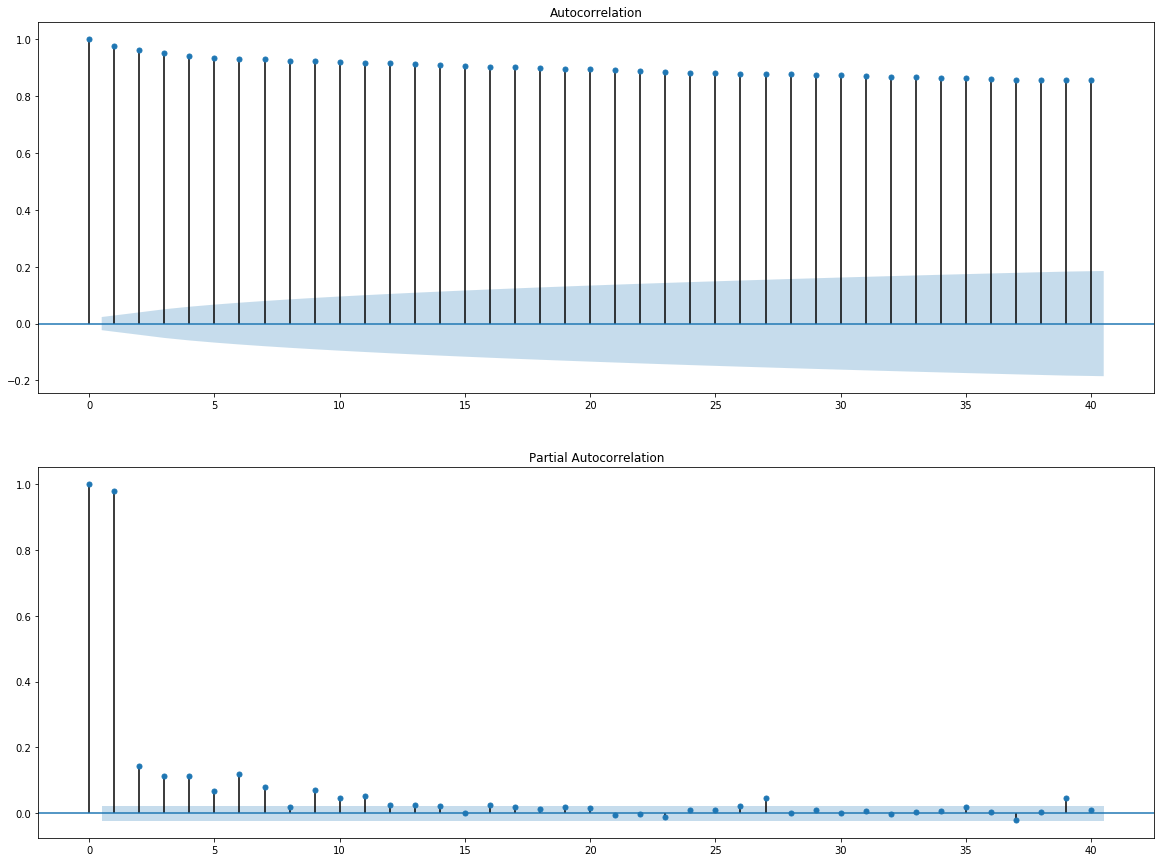

In [11]:
# TRANSFORMACION LOGARITMO PARA ESTABILIZAR VARIANZA

M1TebsabLog=np.log(M1Tebsab)
M1TebsabLog.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1TebsabLog.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1TebsabLog, lags=40, ax=ax2)

X = M1TebsabLog['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

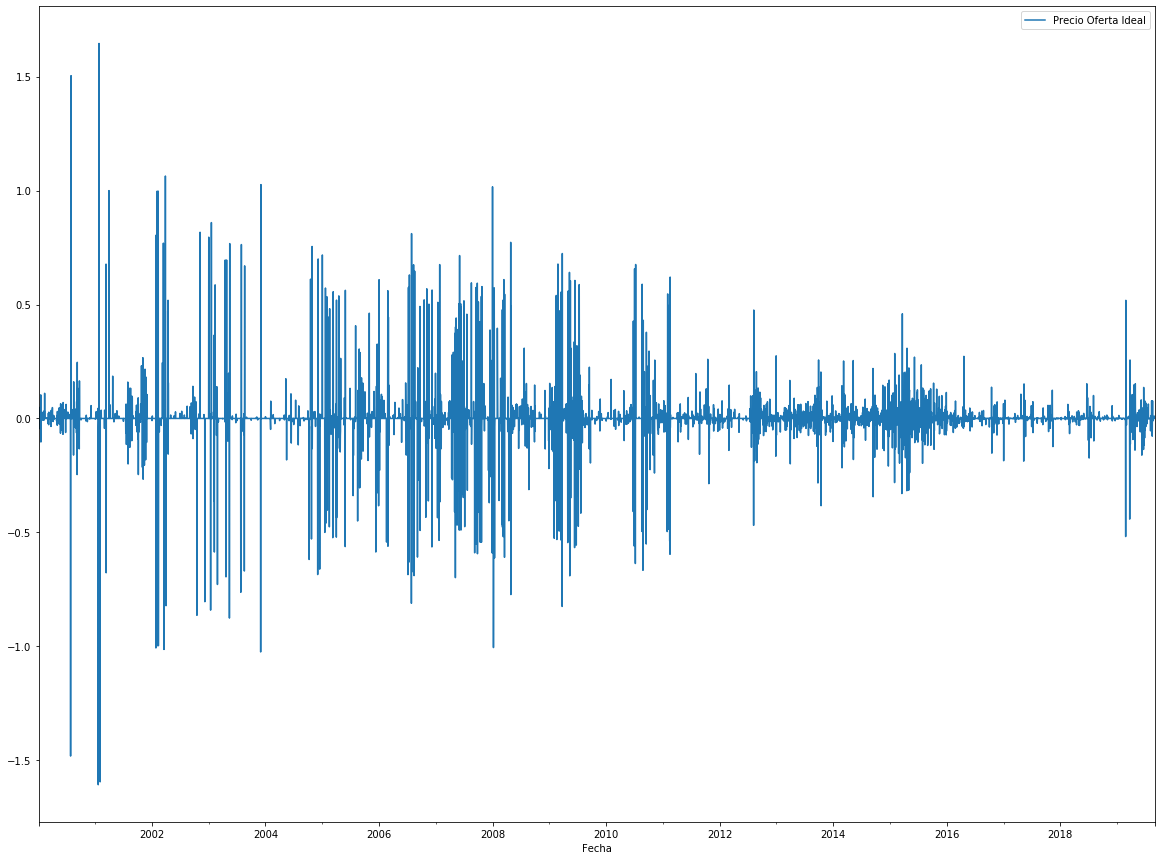

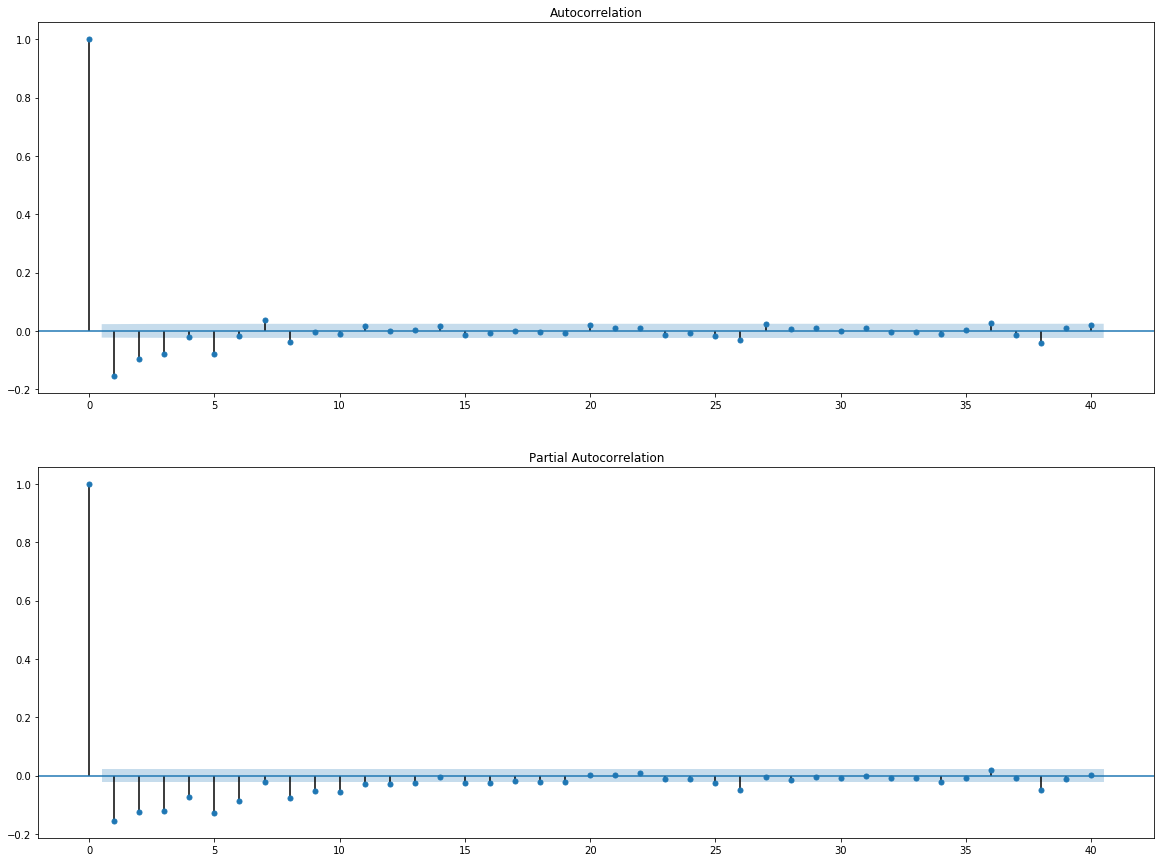

In [12]:
# PRIMERA DIFERENCIACIÓN PARA VOLVER ESTACIONAL
M1TebsabLogDif=M1TebsabLog.diff()
M1TebsabLogDif=M1TebsabLogDif[1:]
M1TebsabLogDif.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1TebsabLogDif.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1TebsabLogDif, lags=40, ax=ax2)

In [13]:
M1TebsabLogA=M1TebsabLog.iloc[:6465]
validar=M1TebsabLog.iloc[6465:]
validar

            Precio Oferta Ideal
Fecha                          
2017-09-13             5.948714
2017-09-14             5.949261
2017-09-15             5.946389
2017-09-16             5.946598
2017-09-17             5.946676
...                         ...
2019-08-27             6.228255
2019-08-28             6.227682
2019-08-29             6.227682
2019-08-30             6.227544
2019-08-31             6.237152

[718 rows x 1 columns]

In [10]:
import warnings

aic_full = pd.DataFrame(np.zeros((6,6), dtype=float))

warnings.simplefilter('ignore')

# Iterate over all ARMA(p,q) models with p,q in [0,6]
for p in range(6):
    for q in range(6):
        if p == 0 and q == 0:
            continue
            
        # Estimate the model with no missing datapoints
        mod = sm.tsa.statespace.SARIMAX(M1TebsabLogA, order=(p,1,q))
        try:
            res = mod.fit(disp=False)
            aic_full.iloc[p,q] = res.aic
        except:
            aic_full.iloc[p,q] = np.nan
print(res.summary())

                            Statespace Model Results                           
Dep. Variable:     Precio Oferta Ideal   No. Observations:                 6465
Model:                SARIMAX(5, 1, 5)   Log Likelihood                4560.884
Date:                 Mon, 28 Oct 2019   AIC                          -9099.768
Time:                         23:35:14   BIC                          -9025.254
Sample:                     01-01-2000   HQIC                         -9073.988
                          - 09-12-2017                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2354      0.107     -2.198      0.028      -0.445      -0.025
ar.L2         -0.4384      0.107     -4.090      0.000      -0.649      -0.228
ar.L3          0.0407      0.085      0.477 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                            Statespace Model Results                           
Dep. Variable:     Precio Oferta Ideal   No. Observations:                 6465
Model:                SARIMAX(5, 1, 5)   Log Likelihood                4560.537
Date:                 Mon, 28 Oct 2019   AIC                          -9097.074
Time:                         23:56:39   BIC                          -9015.786
Sample:                     01-01-2000   HQIC                         -9068.951
                          - 09-12-2017                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.001      0.503      0.615      -0.001       0.002
ar.L1         -0.2154      0.126     -1.712      0.087      -0.462       0.031
ar.L2         -0.3119      0.136     -2.286 

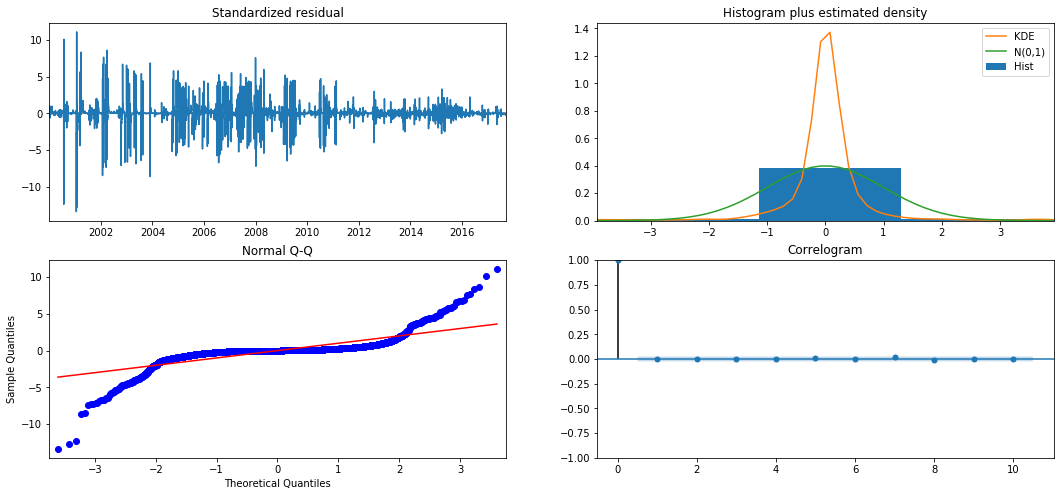

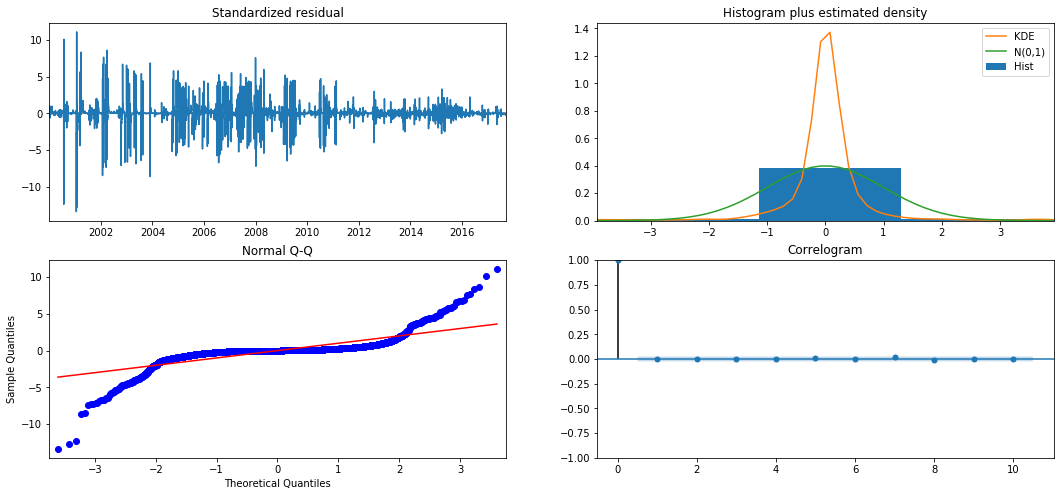

In [23]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
Modelo1Tebsab = sm.tsa.statespace.SARIMAX(M1TebsabLogA, trend='c', order=(5,1,5)).fit(disp=False)
print(Modelo1Tebsab.summary())
print(stats.normaltest(Modelo1Tebsab.resid))

Modelo1Tebsab.plot_diagnostics(figsize=(18, 8))

ARIMA model MSE:0.005739532107599781


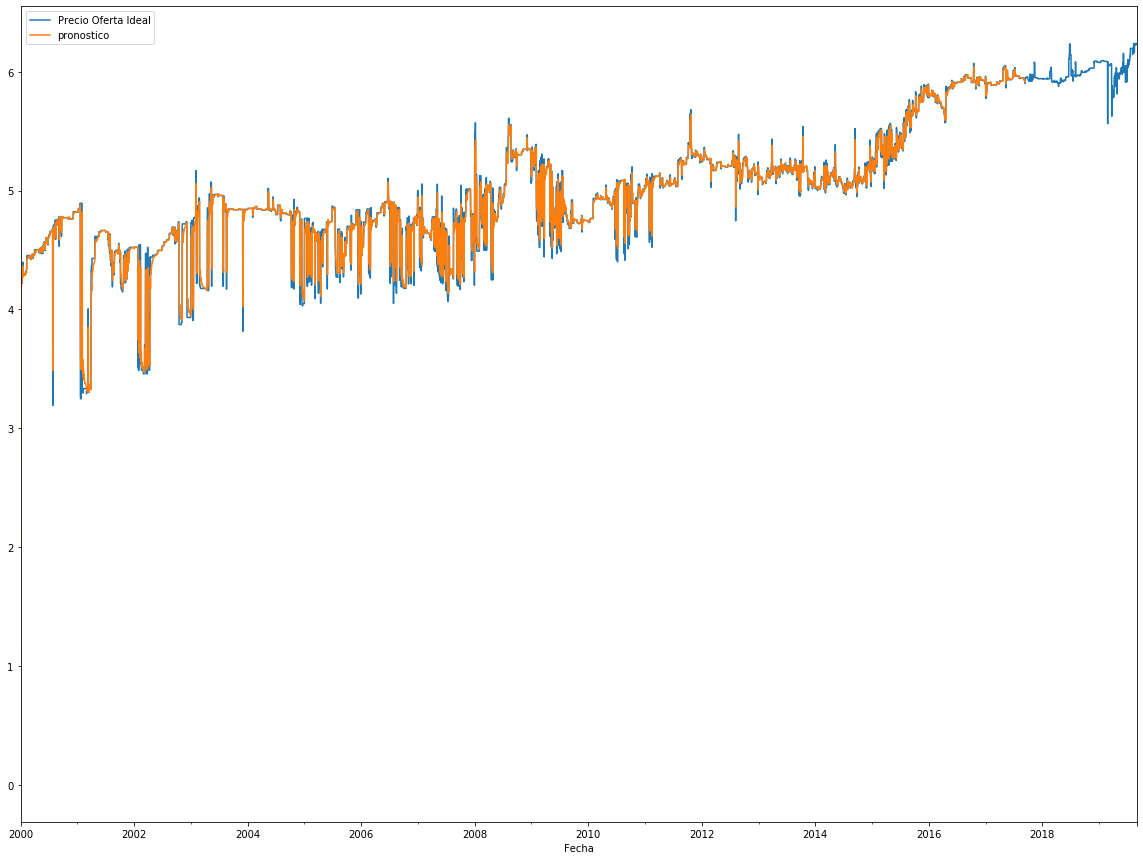

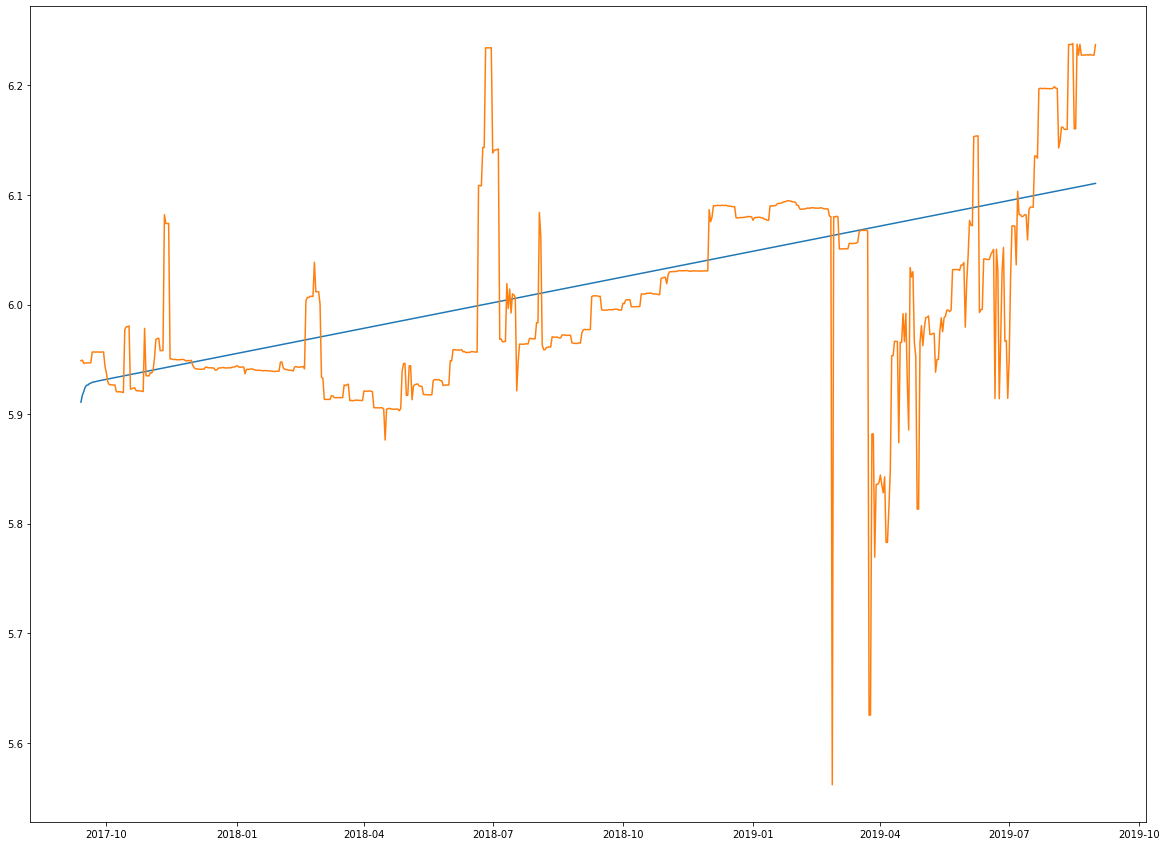

In [24]:
from sklearn.metrics import mean_squared_error
M1TebsabLog['pronostico'] = Modelo1Tebsab.fittedvalues  
plot = M1TebsabLog[['Precio Oferta Ideal', 'pronostico']].plot(figsize=(20, 15))

pred = Modelo1Tebsab.predict('2017-09-12','2019-08-31')[1:]
plt.figure(figsize=(20,15))
print('ARIMA model MSE:{}'.format(mean_squared_error(validar,pred)))
plt.plot(pred)
plt.plot(validar)
plt.show()